# Read and Save raw data

In [1]:
import numpy as np
import matplotlib
import mne 

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
#raw.plot(duration=10)
raw.info
                

Opening raw data file /Users/jacobloranger/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

# Delete all Non-EEG channels from data

In [2]:

# deleted_ch = ['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'MEG 0741', 'MEG 0813', 'MEG 0812', 'MEG 0811', 'MEG 0822', 'MEG 0823', 'MEG 0821', 'MEG 0913', 'MEG 0912', 'MEG 0911', 'MEG 0923', 'MEG 0922', 'MEG 0921', 'MEG 0932', 'MEG 0933', 'MEG 0931', 'MEG 0942', 'MEG 0943', 'MEG 0941', 'MEG 1013', 'MEG 1012', 'MEG 1011', 'MEG 1023', 'MEG 1022', 'MEG 1021', 'MEG 1032', 'MEG 1033', 'MEG 1031', 'MEG 1043', 'MEG 1042', 'MEG 1041', 'MEG 1112', 'MEG 1113', 'MEG 1111', 'MEG 1123', 'MEG 1122', 'MEG 1121', 'MEG 1133', 'MEG 1132', 'MEG 1131', 'MEG 1142', 'MEG 1143', 'MEG 1141', 'MEG 1213', 'MEG 1212', 'MEG 1211', 'MEG 1223', 'MEG 1222', 'MEG 1221', 'MEG 1232', 'MEG 1233', 'MEG 1231', 'MEG 1243', 'MEG 1242', 'MEG 1241', 'MEG 1312', 'MEG 1313', 'MEG 1311', 'MEG 1323', 'MEG 1322', 'MEG 1321', 'MEG 1333', 'MEG 1332', 'MEG 1331', 'MEG 1342', 'MEG 1343', 'MEG 1341', 'MEG 1412', 'MEG 1413', 'MEG 1411', 'MEG 1423', 'MEG 1422', 'MEG 1421', 'MEG 1433', 'MEG 1432', 'MEG 1431', 'MEG 1442', 'MEG 1443', 'MEG 1441', 'MEG 1512', 'MEG 1513', 'MEG 1511', 'MEG 1522', 'MEG 1523', 'MEG 1521', 'MEG 1533', 'MEG 1532', 'MEG 1531', 'MEG 1543', 'MEG 1542', 'MEG 1541', 'MEG 1613', 'MEG 1612', 'MEG 1611', 'MEG 1622', 'MEG 1623', 'MEG 1621', 'MEG 1632', 'MEG 1633', 'MEG 1631', 'MEG 1643', 'MEG 1642', 'MEG 1641', 'MEG 1713', 'MEG 1712', 'MEG 1711', 'MEG 1722', 'MEG 1723', 'MEG 1721', 'MEG 1732', 'MEG 1733', 'MEG 1731', 'MEG 1743', 'MEG 1742', 'MEG 1741', 'MEG 1813', 'MEG 1812', 'MEG 1811', 'MEG 1822', 'MEG 1823', 'MEG 1821', 'MEG 1832', 'MEG 1833', 'MEG 1831', 'MEG 1843', 'MEG 1842', 'MEG 1841', 'MEG 1912', 'MEG 1913', 'MEG 1911', 'MEG 1923', 'MEG 1922', 'MEG 1921', 'MEG 1932', 'MEG 1933', 'MEG 1931', 'MEG 1943', 'MEG 1942', 'MEG 1941', 'MEG 2013', 'MEG 2012', 'MEG 2011', 'MEG 2023', 'MEG 2022', 'MEG 2021', 'MEG 2032', 'MEG 2033', 'MEG 2031', 'MEG 2042', 'MEG 2043', 'MEG 2041', 'MEG 2113', 'MEG 2112', 'MEG 2111', 'MEG 2122', 'MEG 2123', 'MEG 2121', 'MEG 2133', 'MEG 2132', 'MEG 2131', 'MEG 2143', 'MEG 2142', 'MEG 2141', 'MEG 2212', 'MEG 2213', 'MEG 2211', 'MEG 2223', 'MEG 2222', 'MEG 2221', 'MEG 2233', 'MEG 2232', 'MEG 2231', 'MEG 2242', 'MEG 2243', 'MEG 2241', 'MEG 2312', 'MEG 2313', 'MEG 2311', 'MEG 2323', 'MEG 2322', 'MEG 2321', 'MEG 2332', 'MEG 2333', 'MEG 2331', 'MEG 2343', 'MEG 2342', 'MEG 2341', 'MEG 2412', 'MEG 2413', 'MEG 2411', 'MEG 2423', 'MEG 2422', 'MEG 2421', 'MEG 2433', 'MEG 2432', 'MEG 2431', 'MEG 2442', 'MEG 2443', 'MEG 2441', 'MEG 2512', 'MEG 2513', 'MEG 2511', 'MEG 2522', 'MEG 2523', 'MEG 2521', 'MEG 2533', 'MEG 2532', 'MEG 2531', 'MEG 2543', 'MEG 2542', 'MEG 2541', 'MEG 2612', 'MEG 2613', 'MEG 2611', 'MEG 2623', 'MEG 2622', 'MEG 2621', 'MEG 2633', 'MEG 2632', 'MEG 2631', 'MEG 2642', 'MEG 2643', 'MEG 2641']
# raw.drop_channels(deleted_ch)
# raw.plot(start = 10, duration= 20 )


# Preprocessing

- Perform an ICA 
- Identify and omit eye blinks using EOG channel data

In [3]:
# pick some channels that clearly show heartbeats and blinks
regexp = r'(MEG [12][45][123]1|EEG 00.)'
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
        

Using EOG channel: EOG 061
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1502 samples (10.003 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected: 46
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 4)
Using data from preloaded Raw for 46 events and 151 original time points ...
0 bad epochs dropped
Applying baseline c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Created an SSP operator (subspace dimension = 4)
4 projection items activated
SSP projectors applied...
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


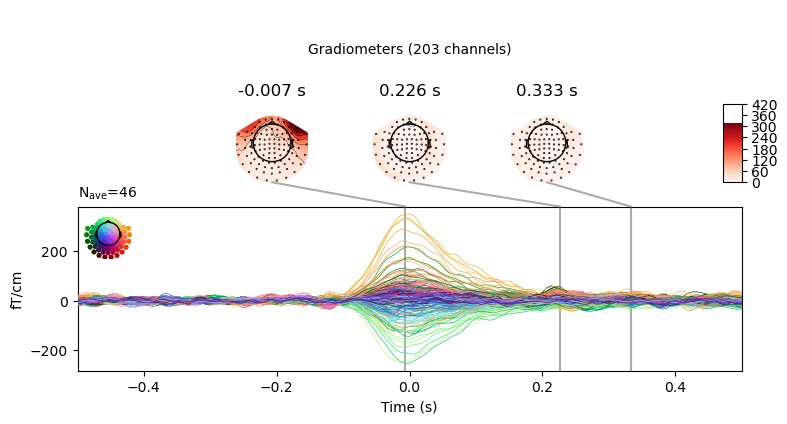

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


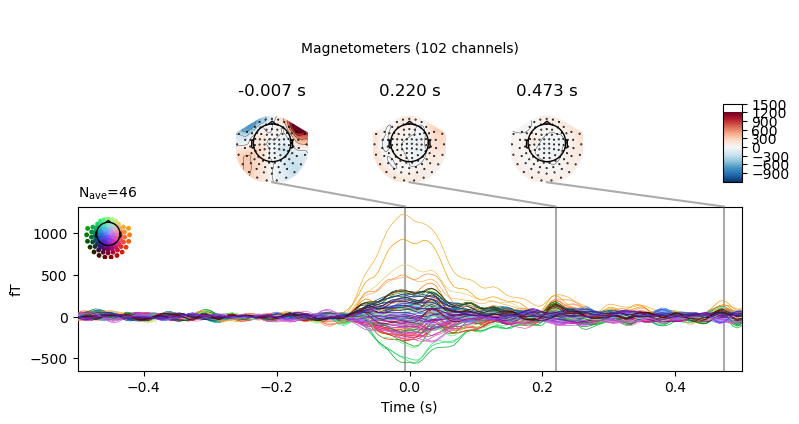

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


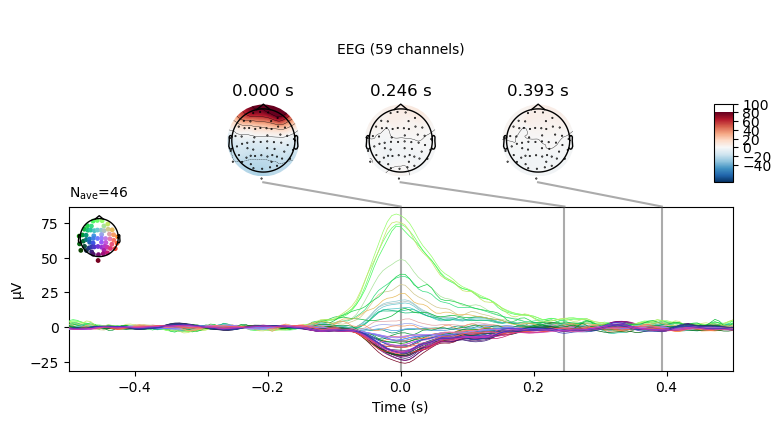

[<Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>]

In [4]:
#Visualize EOG artifacts
eog_evoked = mne.preprocessing.create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 497 samples (3.310 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 364 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    0.7s finished


Selecting by number: 15 components
Fitting ICA took 2.0s.
Using EOG channel: EOG 061
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1502 samples (10.003 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper tran

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 364 PCA components
Using matplotlib as 2D backend.


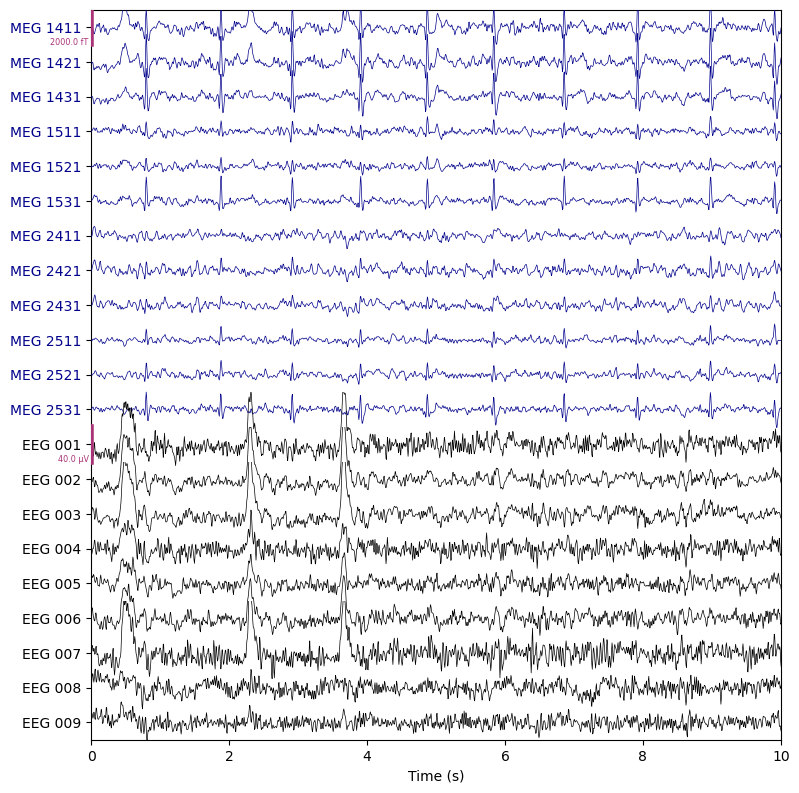

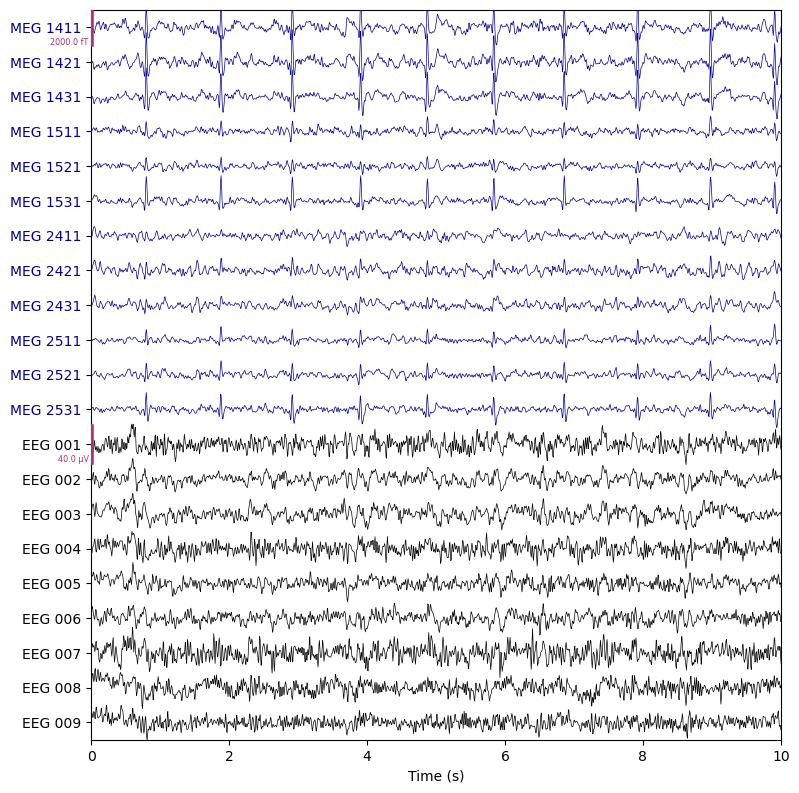

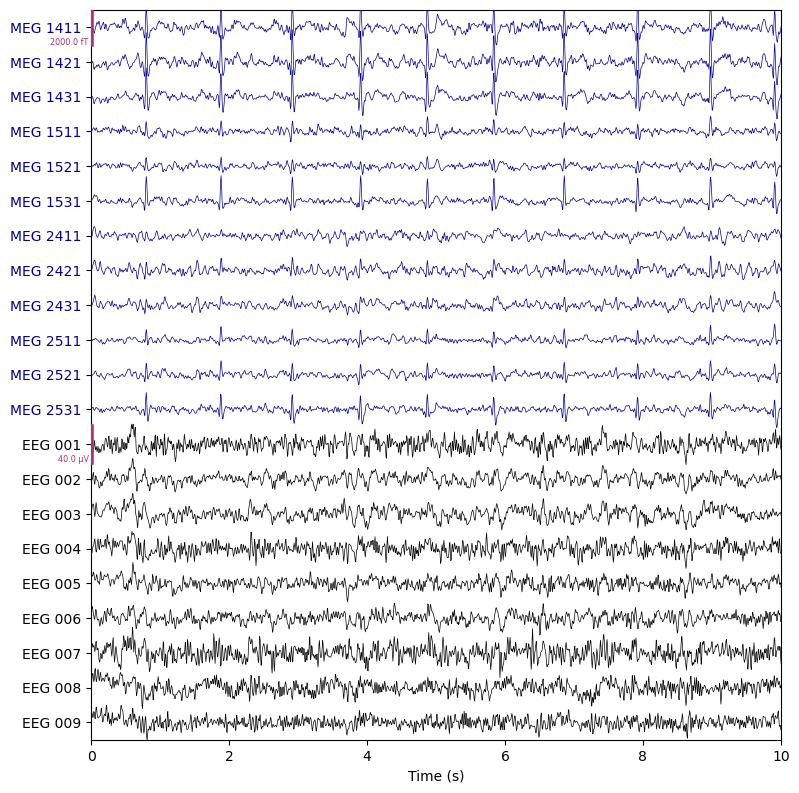

In [5]:
ica = mne.preprocessing.ICA(n_components=15, max_iter='auto', random_state=97)
ica.fit(raw.filter(l_freq=1., h_freq=None))
ica.exclude = []

# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude = eog_indices

reconst_raw = raw.copy()
ica.apply(reconst_raw)


raw.plot(order=artifact_picks, n_channels=len(artifact_picks),
         show_scrollbars=False)
reconst_raw.plot(order=artifact_picks, n_channels=len(artifact_picks),
                 show_scrollbars=False)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)


/Users/jacobloranger/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/Users/jacobloranger/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


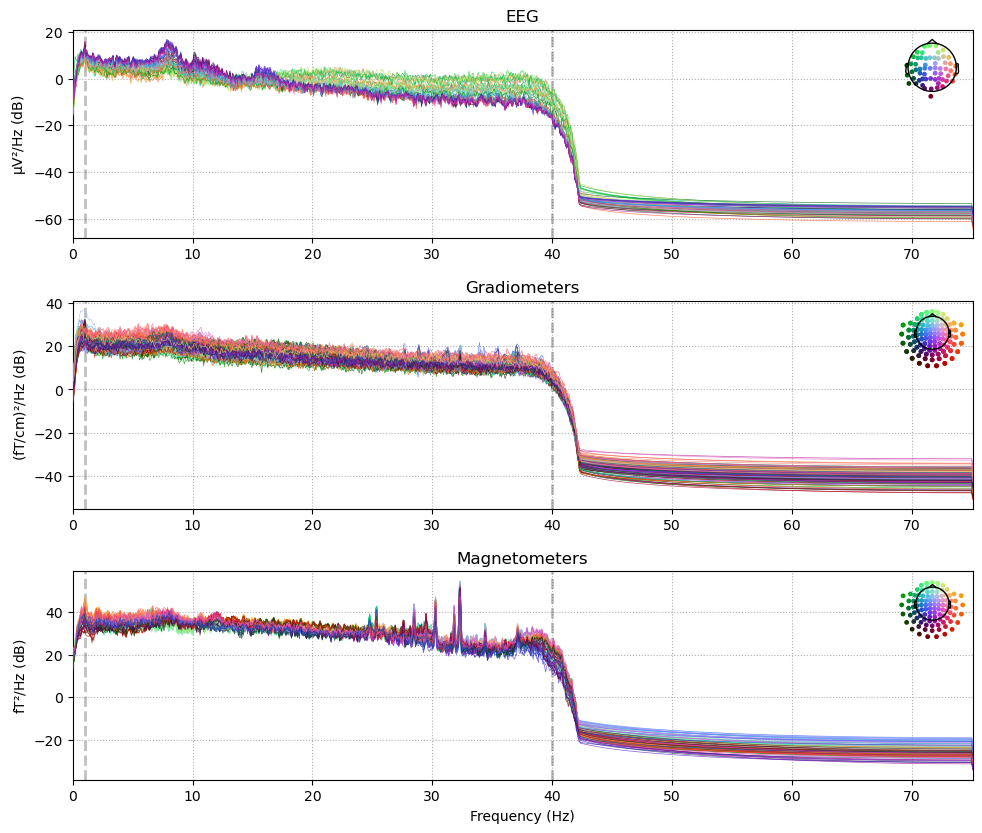

In [6]:
raw.plot_psd()
reconst_raw.plot_psd()

# 